# Unit 1: Train your first Deep Reinforcement Learning Agent 🤖

![Cover](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/thumbnail.jpg)

In this notebook, you'll train your **first Deep Reinforcement Learning agent** a Lunar Lander agent that will learn to **land correctly on the Moon 🌕**. Using [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/) a Deep Reinforcement Learning library, share them with the community, and experiment with different configurations

⬇️ Here is an example of what **you will achieve in just a couple of minutes.** ⬇️




In [3]:
# Подключение данных гугл диска
from os.path import join as pjoin
from google.colab import drive, userdata
drive.mount('/content/drive')
os.environ['HF_TOKEN'] = userdata.get('HF_TOKEN')

gdrive_path = '/content/drive/MyDrive'
hf_deep_rl_folder = pjoin(gdrive_path, 'hf_deep_rl_course')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%html
<video controls autoplay><source src="https://huggingface.co/sb3/ppo-LunarLander-v2/resolve/main/replay.mp4" type="video/mp4"></video>

### The environment 🎮

- [LunarLander-v2](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

### The library used 📚

- [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/)

We're constantly trying to improve our tutorials, so **if you find some issues in this notebook**, please [open an issue on the Github Repo](https://github.com/huggingface/deep-rl-class/issues).

## Objectives of this notebook 🏆

At the end of the notebook, you will:

- Be able to use **Gymnasium**, the environment library.
- Be able to use **Stable-Baselines3**, the deep reinforcement learning library.
- Be able to **push your trained agent to the Hub** with a nice video replay and an evaluation score 🔥.




## This notebook is from Deep Reinforcement Learning Course


In this free course, you will:

- 📖 Study Deep Reinforcement Learning in **theory and practice**.
- 🧑‍💻 Learn to **use famous Deep RL libraries** such as Stable Baselines3, RL Baselines3 Zoo, CleanRL and Sample Factory 2.0.
- 🤖 Train **agents in unique environments**
- 🎓 **Earn a certificate of completion** by completing 80% of the assignments.

And more!

Check 📚 the syllabus 👉 https://simoninithomas.github.io/deep-rl-course

Don’t forget to **<a href="http://eepurl.com/ic5ZUD">sign up to the course</a>** (we are collecting your email to be able to **send you the links when each Unit is published and give you information about the challenges and updates).**

The best way to keep in touch and ask questions is **to join our discord server** to exchange with the community and with us 👉🏻 https://discord.gg/ydHrjt3WP5

## Prerequisites 🏗️

Before diving into the notebook, you need to:

🔲 📝 **[Read Unit 0](https://huggingface.co/deep-rl-course/unit0/introduction)** that gives you all the **information about the course and helps you to onboard** 🤗

🔲 📚 **Develop an understanding of the foundations of Reinforcement learning** (RL process, Rewards hypothesis...) by [reading Unit 1](https://huggingface.co/deep-rl-course/unit1/introduction).

## A small recap of Deep Reinforcement Learning 📚

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/RL_process_game.jpg" alt="The RL process" width="100%">

Let's do a small recap on what we learned in the first Unit:

- Reinforcement Learning is a **computational approach to learning from actions**. We build an agent that learns from the environment by **interacting with it through trial and error** and receiving rewards (negative or positive) as feedback.

- The goal of any RL agent is to **maximize its expected cumulative reward** (also called expected return) because RL is based on the _reward hypothesis_, which is that all goals can be described as the maximization of an expected cumulative reward.

- The RL process is a **loop that outputs a sequence of state, action, reward, and next state**.

- To calculate the expected cumulative reward (expected return), **we discount the rewards**: the rewards that come sooner (at the beginning of the game) are more probable to happen since they are more predictable than the long-term future reward.

- To solve an RL problem, you want to **find an optimal policy**; the policy is the "brain" of your AI that will tell us what action to take given a state. The optimal one is the one that gives you the actions that max the expected return.

There are **two** ways to find your optimal policy:

- By **training your policy directly**: policy-based methods.
- By **training a value function** that tells us the expected return the agent will get at each state and use this function to define our policy: value-based methods.

- Finally, we spoke about Deep RL because **we introduce deep neural networks to estimate the action to take (policy-based) or to estimate the value of a state (value-based) hence the name "deep."**

# Let's train our first Deep Reinforcement Learning agent and upload it to the Hub 🚀

## Get a certificate 🎓

To validate this hands-on for the [certification process](https://huggingface.co/deep-rl-course/en/unit0/introduction#certification-process), you need to push your trained model to the Hub and **get a result of >= 200**.

To find your result, go to the [leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) and find your model, **the result = mean_reward - std of reward**

For more information about the certification process, check this section 👉 https://huggingface.co/deep-rl-course/en/unit0/introduction#certification-process

## Set the GPU 💪

- To **accelerate the agent's training, we'll use a GPU**. To do that, go to `Runtime > Change Runtime type`

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/gpu-step1.jpg" alt="GPU Step 1">

- `Hardware Accelerator > GPU`

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/gpu-step2.jpg" alt="GPU Step 2">

## Install dependencies and create a virtual screen 🔽

The first step is to install the dependencies, we’ll install multiple ones.

- `gymnasium[box2d]`: Contains the LunarLander-v2 environment 🌛
- `stable-baselines3[extra]`: The deep reinforcement learning library.
- `huggingface_sb3`: Additional code for Stable-baselines3 to load and upload models from the Hugging Face 🤗 Hub.

To make things easier, we created a script to install all these dependencies.

In [2]:
!apt install swig cmake

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 2s (523 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 126380 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubunt

In [3]:
!pip install -r https://raw.githubusercontent.com/huggingface/deep-rl-class/main/notebooks/unit1/requirements-unit1.txt

INFO: pip is looking at multiple versions of gymnasium[box2d] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 117.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━

During the notebook, we'll need to generate a replay video. To do so, with colab, **we need to have a virtual screen to be able to render the environment** (and thus record the frames).

Hence the following cell will install virtual screen libraries and create and run a virtual screen 🖥

In [4]:
!sudo apt-get update
!sudo apt-get install -y python3-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,937 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,521 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jamm

To make sure the new installed libraries are used, **sometimes it's required to restart the notebook runtime**. The next cell will force the **runtime to crash, so you'll need to connect again and run the code starting from here**. Thanks to this trick, **we will be able to run our virtual screen.**

In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

## Import the packages 📦

One additional library we import is huggingface_hub **to be able to upload and download trained models from the hub**.


The Hugging Face Hub 🤗 works as a central place where anyone can share and explore models and datasets. It has versioning, metrics, visualizations and other features that will allow you to easily collaborate with others.

You can see here all the Deep reinforcement Learning models available here👉 https://huggingface.co/models?pipeline_tag=reinforcement-learning&sort=downloads



In [2]:
import torch
assert torch.cuda.is_available()

import gymnasium

from huggingface_sb3 import load_from_hub, package_to_hub
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

import matplotlib
import matplotlib.pyplot as plt

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


## Understand Gymnasium and how it works 🤖

🏋 The library containing our environment is called Gymnasium.
**You'll use Gymnasium a lot in Deep Reinforcement Learning.**

Gymnasium is the **new version of Gym library** [maintained by the Farama Foundation](https://farama.org/).

The Gymnasium library provides two things:

- An interface that allows you to **create RL environments**.
- A **collection of environments** (gym-control, atari, box2D...).

Let's look at an example, but first let's recall the RL loop.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/RL_process_game.jpg" alt="The RL process" width="100%">

At each step:
- Our Agent receives a **state (S0)** from the **Environment** — we receive the first frame of our game (Environment).
- Based on that **state (S0),** the Agent takes an **action (A0)** — our Agent will move to the right.
- The environment transitions to a **new** **state (S1)** — new frame.
- The environment gives some **reward (R1)** to the Agent — we’re not dead *(Positive Reward +1)*.


With Gymnasium:

1️⃣ We create our environment using `gymnasium.make()`

2️⃣ We reset the environment to its initial state with `observation = env.reset()`

At each step:

3️⃣ Get an action using our model (in our example we take a random action)

4️⃣ Using `env.step(action)`, we perform this action in the environment and get
- `observation`: The new state (st+1)
- `reward`: The reward we get after executing the action
- `terminated`: Indicates if the episode terminated (agent reach the terminal state)
- `truncated`: Introduced with this new version, it indicates a timelimit or if an agent go out of bounds of the environment for instance.
- `info`: A dictionary that provides additional information (depends on the environment).

For more explanations check this 👉 https://gymnasium.farama.org/api/env/#gymnasium.Env.step

If the episode is terminated:
- We reset the environment to its initial state with `observation = env.reset()`

**Let's look at an example!** Make sure to read the code


In [4]:
import gymnasium as gym

# First, we create our environment called LunarLander-v2
env = gym.make("LunarLander-v2")

# Then we reset this environment
observation, info = env.reset()

for _ in range(20):
  # Take a random action
  action = env.action_space.sample()
  print("Action taken:", action)

  # Do this action in the environment and get
  # next_state, reward, terminated, truncated and info
  observation, reward, terminated, truncated, info = env.step(action)

  # If the game is terminated (in our case we land, crashed) or truncated (timeout)
  if terminated or truncated:
      # Reset the environment
      print("Environment is reset")
      observation, info = env.reset()

env.close()

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

Action taken: 3
Action taken: 0
Action taken: 3
Action taken: 2
Action taken: 3
Action taken: 0
Action taken: 3
Action taken: 3
Action taken: 2
Action taken: 1
Action taken: 1
Action taken: 1
Action taken: 0
Action taken: 2
Action taken: 3
Action taken: 2
Action taken: 2
Action taken: 2
Action taken: 3
Action taken: 1


## Create the LunarLander environment 🌛 and understand how it works

### [The environment 🎮](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

In this first tutorial, we’re going to train our agent, a [Lunar Lander](https://gymnasium.farama.org/environments/box2d/lunar_lander/), **to land correctly on the moon**. To do that, the agent needs to learn **to adapt its speed and position (horizontal, vertical, and angular) to land correctly.**

---


💡 A good habit when you start to use an environment is to check its documentation

👉 https://gymnasium.farama.org/environments/box2d/lunar_lander/

---


Let's see what the Environment looks like:


In [5]:
# We create our environment with gym.make("<name_of_the_environment>")
env = gym.make("LunarLander-v2")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

Observation Space Shape (8,)
Sample observation [-67.23176      2.0731866    1.1364975   -1.9774309    2.6518993
  -2.0366406    0.44331986   0.79369164]


We see with `Observation Space Shape (8,)` that the observation is a vector of size 8, where each value contains different information about the lander:
- Horizontal pad coordinate (x)
- Vertical pad coordinate (y)
- Horizontal speed (x)
- Vertical speed (y)
- Angle
- Angular speed
- If the left leg contact point has touched the land (boolean)
- If the right leg contact point has touched the land (boolean)


In [6]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 0


The action space (the set of possible actions the agent can take) is discrete with 4 actions available 🎮:

- Action 0: Do nothing,
- Action 1: Fire left orientation engine,
- Action 2: Fire the main engine,
- Action 3: Fire right orientation engine.

Reward function (the function that will give a reward at each timestep) 💰:

After every step a reward is granted. The total reward of an episode is the **sum of the rewards for all the steps within that episode**.

For each step, the reward:

- Is increased/decreased the closer/further the lander is to the landing pad.
-  Is increased/decreased the slower/faster the lander is moving.
- Is decreased the more the lander is tilted (angle not horizontal).
- Is increased by 10 points for each leg that is in contact with the ground.
- Is decreased by 0.03 points each frame a side engine is firing.
- Is decreased by 0.3 points each frame the main engine is firing.

The episode receive an **additional reward of -100 or +100 points for crashing or landing safely respectively.**

An episode is **considered a solution if it scores at least 200 points.**

#### Vectorized Environment

- We create a vectorized environment (a method for stacking multiple independent environments into a single environment) of 16 environments, this way, **we'll have more diverse experiences during the training.**

In [7]:
# Create the environment
from stable_baselines3.common.env_util import make_vec_env

env = make_vec_env('LunarLander-v2', n_envs=16)
env

## Create the Model 🤖
- We have studied our environment and we understood the problem: **being able to land the Lunar Lander to the Landing Pad correctly by controlling left, right and main orientation engine**. Now let's build the algorithm we're going to use to solve this Problem 🚀.

- To do so, we're going to use our first Deep RL library, [Stable Baselines3 (SB3)](https://stable-baselines3.readthedocs.io/en/master/).

- SB3 is a set of **reliable implementations of reinforcement learning algorithms in PyTorch**.

---

💡 A good habit when using a new library is to dive first on the documentation: https://stable-baselines3.readthedocs.io/en/master/ and then try some tutorials.

----

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/sb3.png" alt="Stable Baselines3">

To solve this problem, we're going to use SB3 **PPO**. [PPO (aka Proximal Policy Optimization) is one of the SOTA (state of the art) Deep Reinforcement Learning algorithms that you'll study during this course](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#example%5D).

PPO is a combination of:
- *Value-based reinforcement learning method*: learning an action-value function that will tell us the **most valuable action to take given a state and action**.
- *Policy-based reinforcement learning method*: learning a policy that will **give us a probability distribution over actions**.

Stable-Baselines3 is easy to set up:

1️⃣ You **create your environment** (in our case it was done above)

2️⃣ You define the **model you want to use and instantiate this model** `model = PPO("MlpPolicy")`

3️⃣ You **train the agent** with `model.learn` and define the number of training timesteps

```python
# Create environment
env = gym.make('LunarLander-v2')

# Instantiate the agent
model = PPO('MlpPolicy', env, verbose=1)
# Train the agent
model.learn(total_timesteps=int(2e5))
```



In [8]:
import torch
torch.cuda.is_available()

True

In [29]:
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

class TrainingLossCallback(BaseCallback):
    def __init__(self, verbose: int = 0):
        super().__init__(verbose)
        self.mean_rewards = []
        self.losses = []

    def _on_step(self) -> bool:
        # PPO logs metrics to a logger at the end of each rollout (every n_steps)
        # We can check for a new iteration to know when to grab the values.
        if self.n_calls % self.model.n_steps == 0:
            if 'rollout/ep_rew_mean' in self.logger.name_to_value:
                mean_reward = self.logger.name_to_value['rollout/ep_rew_mean']
                self.mean_rewards.append(mean_reward)

            if 'train/policy_loss' in self.logger.name_to_value:
                policy_loss = self.logger.name_to_value['train/policy_loss']
                self.losses.append(policy_loss)
        return True

In [38]:
log_df

,time/time_elapsed,time/fps,time/iterations,rollout/ep_len_mean,time/total_timesteps,rollout/ep_rew_mean,train/n_updates,train/loss,train/policy_gradient_loss,train/value_loss,train/approx_kl,train/clip_fraction,train/clip_range,train/explained_variance,train/entropy_loss,train/learning_rate
0,3,4524,1,90.42,16384,-173.454945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,1517,2,94.23,32768,-146.520176,10.0,1084.580078,-0.005572,3511.159068,0.007679,0.059753,0.2,0.000241,-1.380258,0.0003
2,39,1237,3,91.90,49152,-118.897431,20.0,245.570648,-0.005387,1099.237245,0.007508,0.070886,0.2,-0.000570,-1.372260,0.0003


Using cuda device


Training:   0%|          | 0/81920 [00:00<?, ?it/s]

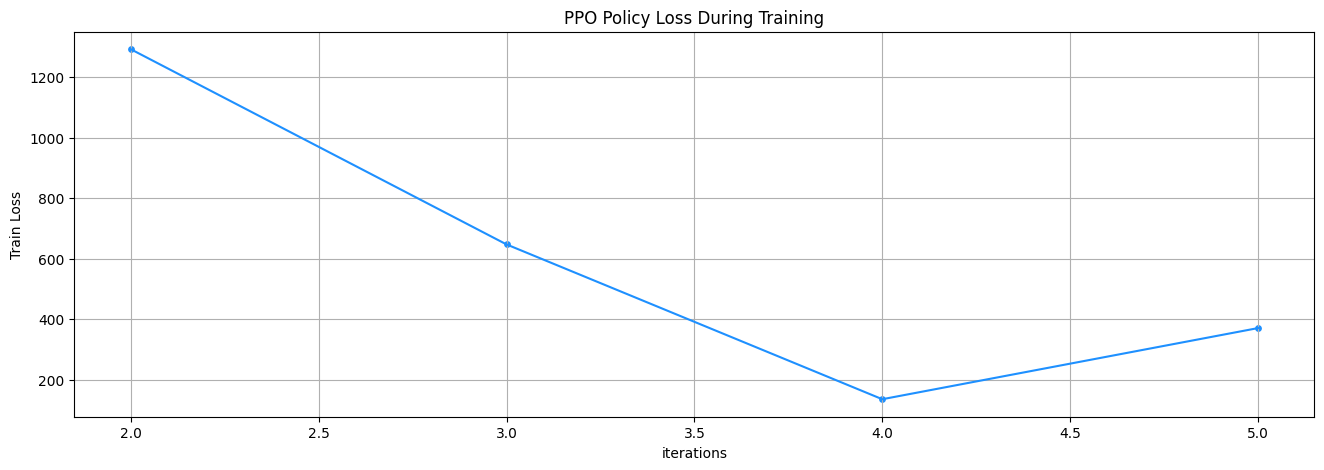

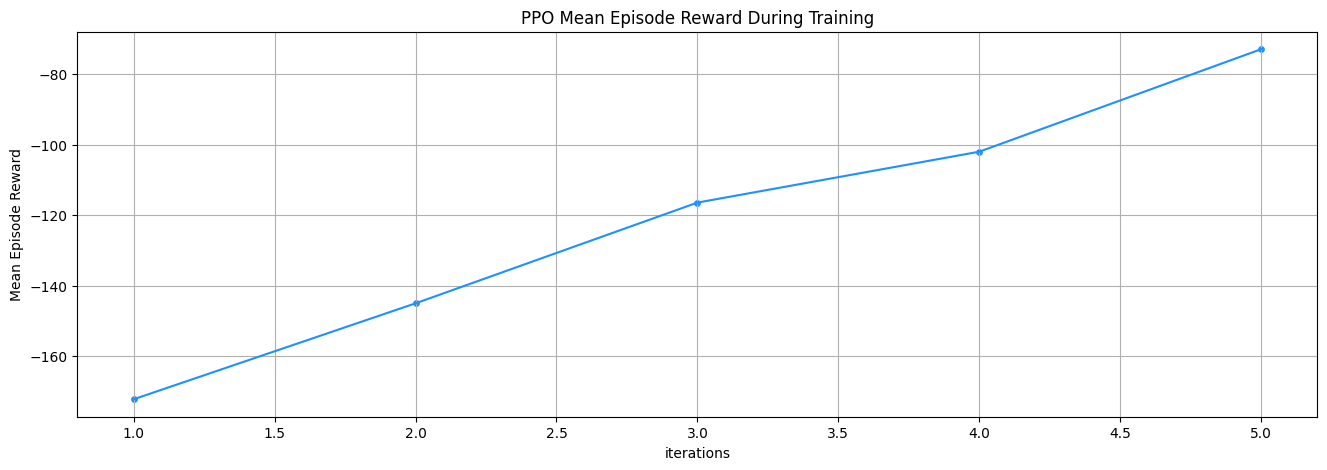

Train loss: [nan, 1291.73828125, 647.0160522460938, 135.69512939453125, 370.6715698242188]
Mean Reward Values: [-172.25678413999998, -145.03783966999998, -116.45800602999998, -102.01434517, -72.92927072]


In [45]:
### nvidia-smi --query-gpu=timestamp,name,utilization.gpu,memory.used --format=csv -l 1

import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.logger import configure

class TrainingLoggerCallback(BaseCallback):
    """
    A callback to log all training metrics from the model's logger history.
    """
    def __init__(self, verbose: int = 0):
        super().__init__(verbose)
        self.pbar = None

    def _on_training_start(self) -> None:
        # This will save all the logger's history to a CSV file
        self.model.set_logger(configure(folder=self.model.logger.dir, format_strings=['csv']))
        self.pbar = tqdm(total=self.locals['total_timesteps'], desc="Training")

    def _on_step(self) -> bool:
        self.pbar.n = self.num_timesteps
        self.pbar.refresh()
        return True

    def _on_training_end(self) -> None:
        """Close the progress bar."""
        self.pbar.close()

# Create the environment
env = make_vec_env('LunarLander-v2', n_envs=16)

# Define the PPO architecture
model_name = "ppo-LunarLander-v2"
model = PPO(
  policy = 'MlpPolicy',
  env = env,
  n_steps = 1024,
  batch_size = 64,
  n_epochs = 10,
  gamma = 0.999,
  gae_lambda = 0.98,
  ent_coef = 0.01,
  verbose=1
)

# Use the logger callback to save all metrics
my_logger_callback = TrainingLoggerCallback()
# Train for enough steps to get multiple log entries
model.learn(total_timesteps=int(1024 * 16 * 5), callback=my_logger_callback)
model.save(model_name)

# --- After Training ---
# Read the saved CSV log file to get the training metrics
csv_path = model.logger.dir + '/progress.csv'
if os.path.exists(csv_path):
    import pandas as pd
    log_df = pd.read_csv(csv_path)

    # Plot the policy loss
    plt.figure(figsize=(16, 5))
    plt.plot(log_df['time/iterations'], log_df['train/loss'], color='dodgerblue')
    plt.scatter(log_df['time/iterations'], log_df['train/loss'], color='dodgerblue', s=15);
    plt.title("PPO Policy Loss During Training")
    plt.xlabel("iterations")
    plt.ylabel("Train Loss")
    plt.grid(True)
    plt.show()

    # Plot the mean reward
    plt.figure(figsize=(16, 5))
    plt.plot(log_df['time/iterations'], log_df['rollout/ep_rew_mean'], color='dodgerblue')
    plt.scatter(log_df['time/iterations'], log_df['rollout/ep_rew_mean'], color='dodgerblue', s=15);
    plt.title("PPO Mean Episode Reward During Training")
    plt.xlabel("iterations")
    plt.ylabel("Mean Episode Reward")
    plt.grid(True)
    plt.show()

    print("Train loss:", log_df['train/loss'].tolist())
    print("Mean Reward Values:", log_df['rollout/ep_rew_mean'].tolist())
else:
    print("No log file found.")

## Train the PPO agent 🏃
- Let's train our agent for 1,000,000 timesteps, don't forget to use GPU on Colab. It will take approximately ~20min, but you can use fewer timesteps if you just want to try it out.
- During the training, take a ☕ break you deserved it 🤗

## Evaluate the agent 📈
- Remember to wrap the environment in a [Monitor](https://stable-baselines3.readthedocs.io/en/master/common/monitor.html).
- Now that our Lunar Lander agent is trained 🚀, we need to **check its performance**.
- Stable-Baselines3 provides a method to do that: `evaluate_policy`.
- To fill that part you need to [check the documentation](https://stable-baselines3.readthedocs.io/en/master/guide/examples.html#basic-usage-training-saving-loading)
- In the next step,  we'll see **how to automatically evaluate and share your agent to compete in a leaderboard, but for now let's do it ourselves**


💡 When you evaluate your agent, you should not use your training environment but create an evaluation environment.

In [46]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
import os

In [47]:
eval_env = Monitor(gym.make("LunarLander-v2", render_mode='rgb_array'))
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

mean_reward=-35.66 +/- 113.49800368510073


In [48]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
import os

# 1. Create your environment
# For a simple example, let's use CartPole-v1
# It's good practice to use a vectorized environment, even for evaluation
env_id = "LunarLander-v2"
n_envs = 1 # For evaluation, one environment is usually enough
eval_env = make_vec_env(env_id, n_envs=n_envs)

# 2. (Optional) Train a dummy model for demonstration
# In your actual use case, this would be your already trained model
# print("Training a dummy PPO model on CartPole-v1...")
# model = PPO("MlpPolicy", eval_env, verbose=0)
# model.learn(total_timesteps=10_000)
# print("Training complete.")

# 3. Use evaluate_policy

# Parameters:
#   model: The trained Stable Baselines3 model instance.
#   env: The environment to evaluate the policy on. It can be a single env or a VecEnv.
#   n_eval_episodes: The number of episodes to run for evaluation. More episodes give more reliable statistics.
#   deterministic: If True, actions are chosen deterministically (argmax for continuous, greedy for discrete).
#                  If False, actions are chosen stochastically (sampling from policy distribution).
#                  Usually True for evaluation to get consistent performance.
#   render: If True, renders the environment. Can be 'human' for display or 'rgb_array' for recording.
#           Be careful with 'human' in headless environments.
#   callback: A custom callback function that is called after each step during evaluation.
#   reward_threshold: If specified, a warning is issued if the mean reward falls below this.
#   return_episode_rewards: If True, returns a tuple (all_rewards, all_lengths)
#   warn: If True, issues a warning if the number of episodes evaluated is less than n_eval_episodes
#         (e.g., due to environment crashing).


print(f"\nEvaluating the model on {env_id} for 20 episodes (deterministic)...")
mean_reward_det, std_reward_det = evaluate_policy(
    model,
    eval_env,
    n_eval_episodes=20,
    deterministic=True, # Use deterministic actions for consistent evaluation
    render=False,       # Set to True if you want to see the agent play
    warn=False          # Suppress warnings if evaluation is cut short (e.g., env done early)
)

print(f"Mean reward (deterministic): {mean_reward_det:.2f} +/- {std_reward_det:.2f}")

print(f"\nEvaluating the model on {env_id} for 20 episodes (stochastic)...")
mean_reward_stoch, std_reward_stoch = evaluate_policy(
    model,
    eval_env,
    n_eval_episodes=20,
    deterministic=False, # Use stochastic actions
    warn=False
)
print(f"Mean reward (stochastic): {mean_reward_stoch:.2f} +/- {std_reward_stoch:.2f}")


# You can also get individual episode rewards and lengths
print(f"\nEvaluating the model and returning individual episode rewards and lengths...")
episode_rewards, episode_lengths = evaluate_policy(
    model,
    eval_env,
    n_eval_episodes=10,
    return_episode_rewards=True, # This enables returning the lists
    warn=False
)
print("Episode Rewards:", episode_rewards)
print("Episode Lengths:", episode_lengths)

# Close the environment after evaluation
eval_env.close()


Evaluating the model on LunarLander-v2 for 20 episodes (deterministic)...
Mean reward (deterministic): -34.92 +/- 118.68

Evaluating the model on LunarLander-v2 for 20 episodes (stochastic)...
Mean reward (stochastic): -53.83 +/- 24.14

Evaluating the model and returning individual episode rewards and lengths...
Episode Rewards: [134.842659, -190.546997, 149.744377, -42.038261, 178.070471, -90.948084, 10.177593, -14.211449, -4.901429, -208.816777]
Episode Lengths: [800, 920, 542, 325, 518, 479, 1000, 1000, 1000, 658]


## Publish our trained model on the Hub 🔥
Now that we saw we got good results after the training, we can publish our trained model on the hub 🤗 with one line of code.

📚 The libraries documentation 👉 https://github.com/huggingface/huggingface_sb3/tree/main#hugging-face--x-stable-baselines3-v20

Here's an example of a Model Card (with Space Invaders):

By using `package_to_hub` **you evaluate, record a replay, generate a model card of your agent and push it to the hub**.

This way:
- You can **showcase our work** 🔥
- You can **visualize your agent playing** 👀
- You can **share with the community an agent that others can use** 💾
- You can **access a leaderboard 🏆 to see how well your agent is performing compared to your classmates** 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard


To be able to share your model with the community there are three more steps to follow:

1️⃣ (If it's not already done) create an account on Hugging Face ➡ https://huggingface.co/join

2️⃣ Sign in and then, you need to store your authentication token from the Hugging Face website.
- Create a new token (https://huggingface.co/settings/tokens) **with write role**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/create-token.jpg" alt="Create HF Token">

- Copy the token
- Run the cell below and paste the token

In [49]:
notebook_login()
!git config --global credential.helper store

If you don't want to use a Google Colab or a Jupyter Notebook, you need to use this command instead: `huggingface-cli login`

3️⃣ We're now ready to push our trained agent to the 🤗 Hub 🔥 using `package_to_hub()` function

Let's fill the `package_to_hub` function:
- `model`: our trained model.
- `model_name`: the name of the trained model that we defined in `model_save`
- `model_architecture`: the model architecture we used, in our case PPO
- `env_id`: the name of the environment, in our case `LunarLander-v2`
- `eval_env`: the evaluation environment defined in eval_env
- `repo_id`: the name of the Hugging Face Hub Repository that will be created/updated `(repo_id = {username}/{repo_name})`

💡 **A good name is {username}/{model_architecture}-{env_id}**

- `commit_message`: message of the commit

In [50]:
import gymnasium as gym
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

from huggingface_sb3 import package_to_hub

## TODO: Define a repo_id
## repo_id is the id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
repo_id = 'antoncio/lunar_lander'

# TODO: Define the name of the environment
env_id = 'LunarLander-v2'

# Create the evaluation env and set the render_mode="rgb_array"
eval_env = DummyVecEnv([lambda: Monitor(gym.make(env_id, render_mode="rgb_array"))])


# TODO: Define the model architecture we used
model_architecture = "PPO MLP"

## TODO: Define the commit message
commit_message = "init commit"

# method save, evaluate, generate a model card and record a replay video of your agent before pushing the repo to the hub
package_to_hub(model=model, # Our trained model
               model_name=model_name, # The name of our trained model
               model_architecture=model_architecture, # The model architecture we used: in our case PPO
               env_id=env_id, # Name of the environment
               eval_env=eval_env, # Evaluation Environment
               repo_id=repo_id, # id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
               commit_message=commit_message)

ℹ This function will save, evaluate, generate a video of your agent,
create a model card and push everything to the hub. It might take up to 1min.
This is a work in progress: if you encounter a bug, please open an issue.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Saving video to /tmp/tmp730yvx15/-step-0-to-step-1000.mp4


/usr/local/lib/python3.11/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """


Moviepy - Building video /tmp/tmp730yvx15/-step-0-to-step-1000.mp4.
Moviepy - Writing video /tmp/tmp730yvx15/-step-0-to-step-1000.mp4




t: 100%|██████████| 1001/1001 [00:03<00:00, 284.22it/s, now=None]
                                                                 

Moviepy - Done !
Moviepy - video ready /tmp/tmp730yvx15/-step-0-to-step-1000.mp4
ℹ Pushing repo antoncio/lunar_lander to the Hugging Face Hub


policy.optimizer.pth:   0%|          | 0.00/88.4k [00:00<?, ?B/s]

policy.pth:   0%|          | 0.00/43.8k [00:00<?, ?B/s]

ppo-LunarLander-v2.zip:   0%|          | 0.00/148k [00:00<?, ?B/s]

pytorch_variables.pth:   0%|          | 0.00/864 [00:00<?, ?B/s]

Upload 5 LFS files:   0%|          | 0/5 [00:00<?, ?it/s]

replay.mp4:   0%|          | 0.00/179k [00:00<?, ?B/s]

ℹ Your model is pushed to the Hub. You can view your model here:
https://huggingface.co/antoncio/lunar_lander/tree/main/


CommitInfo(commit_url='https://huggingface.co/antoncio/lunar_lander/commit/1eddfc430049be153782e002544496584de0788e', commit_message='init commit', commit_description='', oid='1eddfc430049be153782e002544496584de0788e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/antoncio/lunar_lander', endpoint='https://huggingface.co', repo_type='model', repo_id='antoncio/lunar_lander'), pr_revision=None, pr_num=None)

Congrats 🥳 you've just trained and uploaded your first Deep Reinforcement Learning agent. The script above should have displayed a link to a model repository such as https://huggingface.co/osanseviero/test_sb3. When you go to this link, you can:
* See a video preview of your agent at the right.
* Click "Files and versions" to see all the files in the repository.
* Click "Use in stable-baselines3" to get a code snippet that shows how to load the model.
* A model card (`README.md` file) which gives a description of the model

Under the hood, the Hub uses git-based repositories (don't worry if you don't know what git is), which means you can update the model with new versions as you experiment and improve your agent.

Compare the results of your LunarLander-v2 with your classmates using the leaderboard 🏆 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard

## Load a saved LunarLander model from the Hub 🤗
Thanks to [ironbar](https://github.com/ironbar) for the contribution.

Loading a saved model from the Hub is really easy.

You go to https://huggingface.co/models?library=stable-baselines3 to see the list of all the Stable-baselines3 saved models.
1. You select one and copy its repo_id

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit1/copy-id.png" alt="Copy-id"/>

2. Then we just need to use load_from_hub with:
- The repo_id
- The filename: the saved model inside the repo and its extension (*.zip)

Because the model I download from the Hub was trained with Gym (the former version of Gymnasium) we need to install shimmy a API conversion tool that will help us to run the environment correctly.

Shimmy Documentation: https://github.com/Farama-Foundation/Shimmy

In [51]:
!pip install shimmy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.3/944.3 kB 60.0 MB/s eta 0:00:00
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 0.28.1
    Uninstalling gymnasium-0.28.1:
      Successfully uninstalled gymnasium-0.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 2.0.0a5 requires gymnasium==0.28.1, but you have gymnasium 1.2.0 which is incompatible.


In [56]:
from huggingface_sb3 import load_from_hub
repo_id = (
    # "Classroom-workshop/assignment2-omar"
    'antoncio/lunar_lander'
) # The repo_id
filename = (
    "ppo-LunarLander-v2.zip" # The model filename.zip
    # 'LunarLander-v2'
)


# When the model was trained on Python 3.8 the pickle protocol is 5
# But Python 3.6, 3.7 use protocol 4
# In order to get compatibility we need to:
# 1. Install pickle5 (we done it at the beginning of the colab)
# 2. Create a custom empty object we pass as parameter to PPO.load()
custom_objects = {
            "learning_rate": 0.0,
            "lr_schedule": lambda _: 0.0,
            "clip_range": lambda _: 0.0,
}

checkpoint = load_from_hub(repo_id, filename)
model = PPO.load(checkpoint, custom_objects=custom_objects, print_system_info=True)

ppo-LunarLander-v2.zip:   0%|          | 0.00/148k [00:00<?, ?B/s]

== CURRENT SYSTEM INFO ==
- OS: Linux-6.1.123+-x86_64-with-glibc2.35 # 1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
- Python: 3.11.13
- Stable-Baselines3: 2.0.0a5
- PyTorch: 2.6.0+cu124
- GPU Enabled: True
- Numpy: 2.0.2
- Cloudpickle: 3.1.1
- Gymnasium: 0.28.1
- OpenAI Gym: 0.25.2

== SAVED MODEL SYSTEM INFO ==
- OS: Linux-6.1.123+-x86_64-with-glibc2.35 # 1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
- Python: 3.11.13
- Stable-Baselines3: 2.0.0a5
- PyTorch: 2.6.0+cu124
- GPU Enabled: True
- Numpy: 2.0.2
- Cloudpickle: 3.1.1
- Gymnasium: 0.28.1
- OpenAI Gym: 0.25.2



Let's evaluate this agent:

In [57]:
#@title
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

mean_reward=-32.68 +/- 126.80216149664888


## Some additional challenges 🏆
The best way to learn **is to try things by your own**! As you saw, the current agent is not doing great. As a first suggestion, you can train for more steps. With 1,000,000 steps, we saw some great results!

In the [Leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) you will find your agents. Can you get to the top?

Here are some ideas to achieve so:
* Train more steps
* Try different hyperparameters for `PPO`. You can see them at https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#parameters.
* Check the [Stable-Baselines3 documentation](https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html) and try another model such as DQN.
* **Push your new trained model** on the Hub 🔥

**Compare the results of your LunarLander-v2 with your classmates** using the [leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) 🏆

Is moon landing too boring for you? Try to **change the environment**, why not use MountainCar-v0, CartPole-v1 or CarRacing-v0? Check how they work [using the gym documentation](https://www.gymlibrary.dev/) and have fun 🎉.

________________________________________________________________________
Congrats on finishing this chapter! That was the biggest one, **and there was a lot of information.**

If you’re still feel confused with all these elements...it's totally normal! **This was the same for me and for all people who studied RL.**

Take time to really **grasp the material before continuing and try the additional challenges**. It’s important to master these elements and have a solid foundations.

Naturally, during the course, we’re going to dive deeper into these concepts but **it’s better to have a good understanding of them now before diving into the next chapters.**



Next time, in the bonus unit 1, you'll train Huggy the Dog to fetch the stick.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit1/huggy.jpg" alt="Huggy"/>

## Keep learning, stay awesome 🤗

## tmp